In [0]:
import time
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
import  matplotlib.image as img
from tensorflow.keras.models import load_model

import os
import cv2

In [190]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Принимает <br>
1) Название фотографии<br>
2) Название файла с метками<br>
3) Обученную модель<br>
4) Путь к директорию.<br>
5) plot<br>
Если plot = True, то рисует исходную фотографию с распознанными числами, иначе возвращает матрицу этой фотографии

In [0]:
def detect(image_name, label_name,model, path='/content/drive/My Drive/1/', plot =True):
  label_path = path+label_name 
  image_path=path+image_name
  
  label_key = int(label_name.split('.')[0])
  im_key = int(image_name.split('.')[0])
  if label_key!=im_key:
    print("Названия файлов отличаются!!!")
    
  labels_arr = loadtxt(label_path, comments="#", delimiter=" ", unpack=False)
  labels_arr=labels_arr.astype('int')
    
  
  origin_im = cv2.imread(image_path)
  im = cv2.imread(image_path,0)
  
 
  color = (0,255,0)
  for line in labels_arr:
    x, y, w, h, label = line    
    part_img = im[y:y+h, x:x+w]
#     print('{}:{},{}:{}'.format(y, y+h, x, x+w))
    try:
      #уменьшим до размерномть до 28x28
      part_img = cv2.resize(part_img, (28,28))
      #Нормализация пикселов
      part_img = part_img/part_img.max()
      part_img = np.resize(part_img, (1,28,28))
      #Predict class
      pred_label = model.predict_classes(part_img)[0]
      #row bound 
      origin_im = cv2.rectangle(origin_im, (x, y), (x+w, y+h), (255,0,0), 5)
      #put text (class)
      origin_im = cv2.putText(origin_im ,
                              str(pred_label),
                              (x-15, y-5),
                              cv2.FONT_HERSHEY_SIMPLEX,
                              4,color, 10)
      if plot:
        plt.imshow(origin_im)
      else:
        return(origin_im)

      
    except:
        print(label_key,"не удалось")
        


In [0]:
cnn = load_model('cnn_model.h5')
ann = load_model('ann_model.h5')
path = '/content/drive/My Drive/1/'

CPU times: user 1.15 s, sys: 8.07 ms, total: 1.16 s
Wall time: 1.17 s


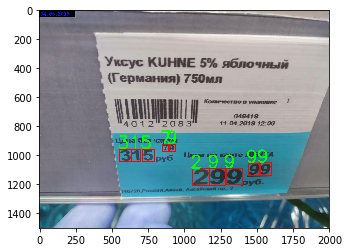

In [210]:
%%time
detect('13.jpg', '13.txt', cnn, plot=True)